# Spaceship Titanic - Machine Learning Competition

### Group Members
       Muaawiyah Dadabhay
       Muhammed Raees Dindar
       Taahir Kolia
       Irfaan Mia - 2434204

## Introduction

In this notebook, four machine-learning models are employed to predict whether passengers were transported to an alternate dimension, utilizing data frames sourced from Kaggle. The models utilized include _w_, _x_, _y_, and _z_.

Kaggle stands as a prominent data science platform renowned for hosting competitions and challenges in the field. It boasts a vibrant community comprising data scientists, statisticians, and machine learning experts who actively contribute their expertise to various projects.

For this particular endeavor, we leverage the Spaceship Titanic dataset available on Kaggle. The primary objective of this notebook is to ascertain which passengers were transported to an alternate dimension subsequent to a spaceship collision.

The methodology entails an initial data analysis, followed by feature engineering to facilitate modeling. Subsequently, the models are constructed and trained utilizing the provided dataset. Finally, comprehensive evaluations of all four models are conducted to ascertain the optimal choice for predicting passenger transportation to alternate dimensions.

## Importing of Python Libraries

In [203]:
#General imports
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#Analysis imports
import sweetviz as sw
import matplotlib.pyplot as plt

#Imputator and encoder imports
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler

#Evaluation imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

#Classifiers imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Feature elimination imports
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

#Hyperparameter tuning imports
from sklearn.model_selection import GridSearchCV
import optuna

#I dont know just something it was recommended not sure why
import warnings
warnings.filterwarnings("ignore")

## 1. Gathering and Understanding Data

### Loading Data from a CSV

In [204]:
test_df = pd.read_csv("../data/test.csv")
train_df = pd.read_csv("../data/train.csv")

### Viewing of the Data

In [205]:
test_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [206]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


### Understanding the Data at Hand

In [207]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [208]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Upon examining the dataframes, we've identified categorical data, which comprises of non-numerical information. Specifically, the categorical features identified include HomePlanet, CryoSleep, Destination, and VIP. These categorical features will undergo transformation into numerical representations as the investigation progresses.

### Determining Duplicate Values

In [209]:
print(f"The total duplicates in the test dataframe are: {test_df.duplicated().sum()}")
print(f"The total duplicates in the train dataframe are: {train_df.duplicated().sum()}")

The total duplicates in the test dataframe are: 0
The total duplicates in the train dataframe are: 0


### Determining Missing Values

In [210]:
print("Test Dataframes Missing Values")
test_df.isna().sum()

Test Dataframes Missing Values


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [211]:
print("Train Dataframes Missing Values")
train_df.isna().sum()

Train Dataframes Missing Values


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

It has been observed that both dataframes contain missing values. In order to address this issue, certain inference and data manipulation steps need to be undertaken to rectify any missing data. However, this task will be deferred until later in the investigation.

For the current stage, the missing values will be replaced with _NaN_. Prior to this replacement, we will merge both dataframes to facilitate the process of filling in values. Subsequently, the dataframes will be separated again as needed in the subsequent stages of the analysis.

In [212]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)
temp_combined_df = combined_df.copy()

In [213]:
combined_df.replace('', np.NaN, inplace=True)
combined_df.fillna(np.NaN, inplace=True)
combined_df.tail(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


## 2. Data Analysis

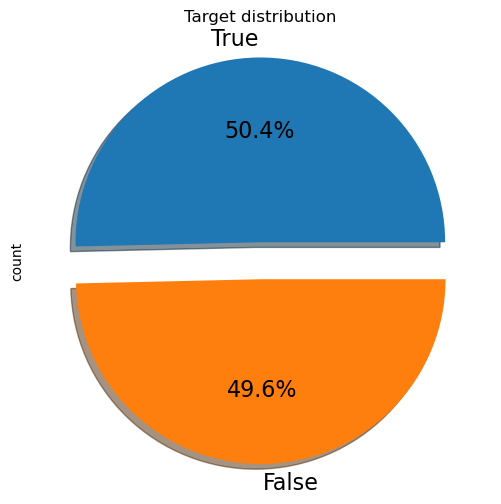

In [214]:
# Figure size
plt.figure(figsize=(6,6));

# Pie plot
train_df['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution");

The target feature is "Transported" which indicates whether or not a passenger was transported to another dimension. Approximately half of all passengers on board were transported.

### Categorical Feature Analysis

The categorical features will be analysed to determine how the target feature depends on the categorical features.

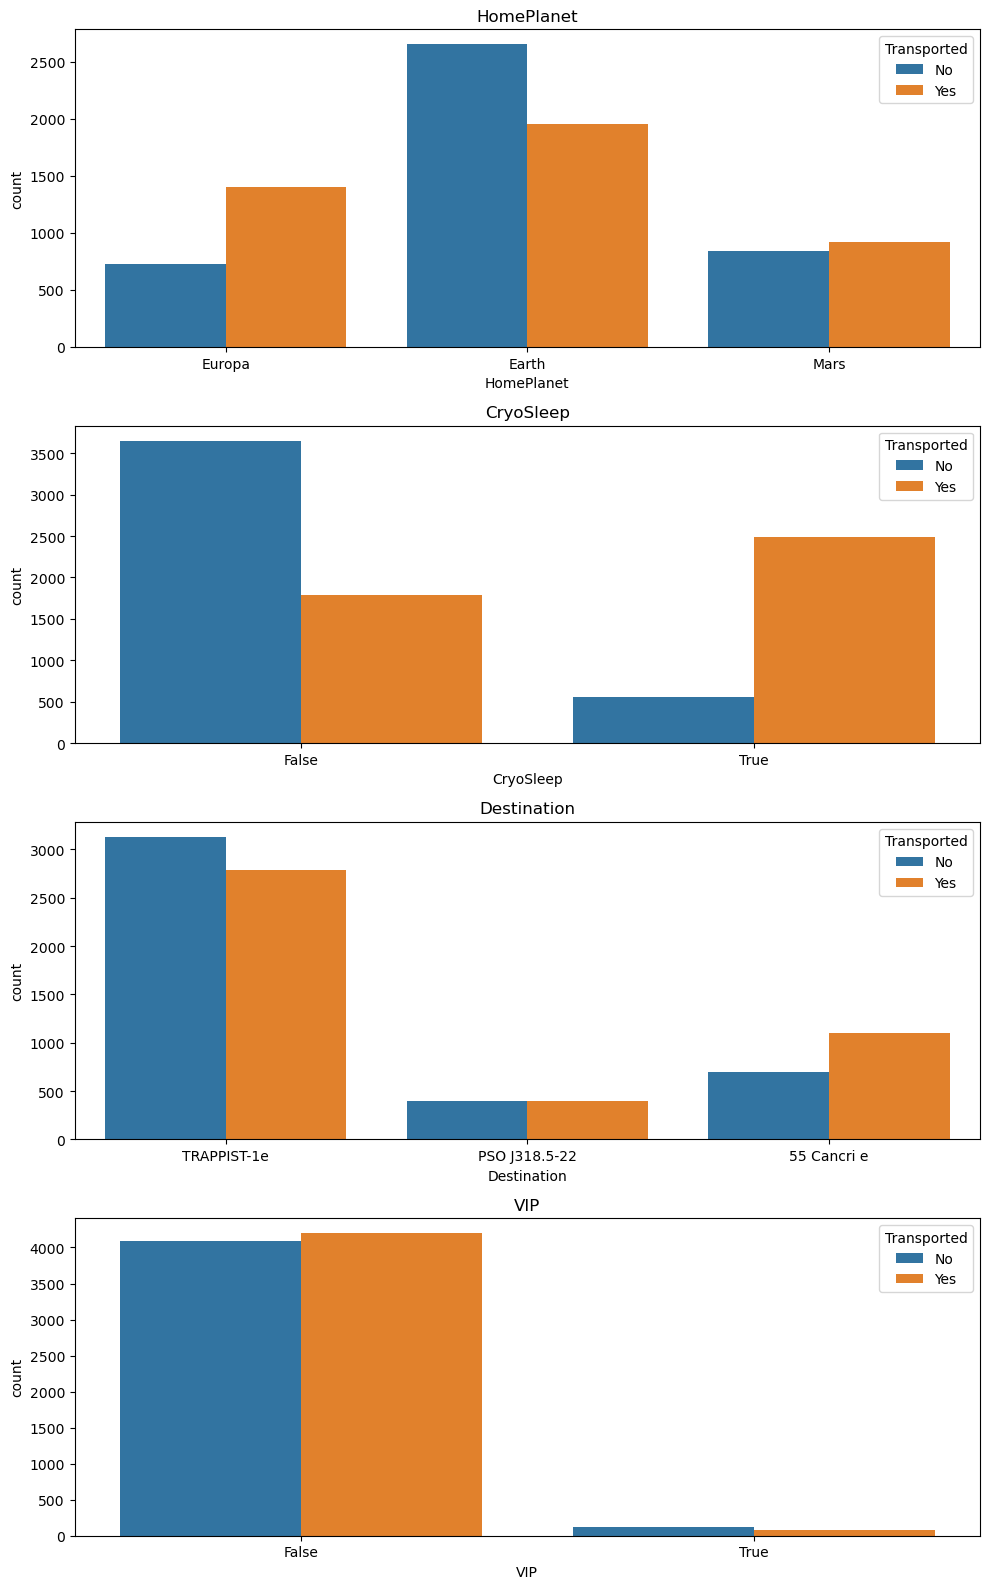

In [215]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Convert boolean values to strings ('Yes' and 'No')
temp_combined_df['Transported'] = combined_df['Transported'].map({True: 'Yes', False: 'No'})

# Plot categorical features
fig = plt.figure(figsize=(10, 16))
for i, var_name in enumerate(cat_feats):
    ax = fig.add_subplot(4, 1, i + 1)
    sns.countplot(data=temp_combined_df, x=var_name, ax=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

The relationship between categorical features and "Transported" are investigated. There  is no direct relationship between "Transported" and "HomePlanet", "Destination", and "VIP". "CryoSleep" appears to have a relationship with "Transported". People that are in CryoSleep have a higher liklihood of being transported compared to people not in CryoSleep [1].

[1]https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide#EDA

### Numerical Feature Analysis


The numerical features will be analysed to determine how the target feature depends on the numerical features.

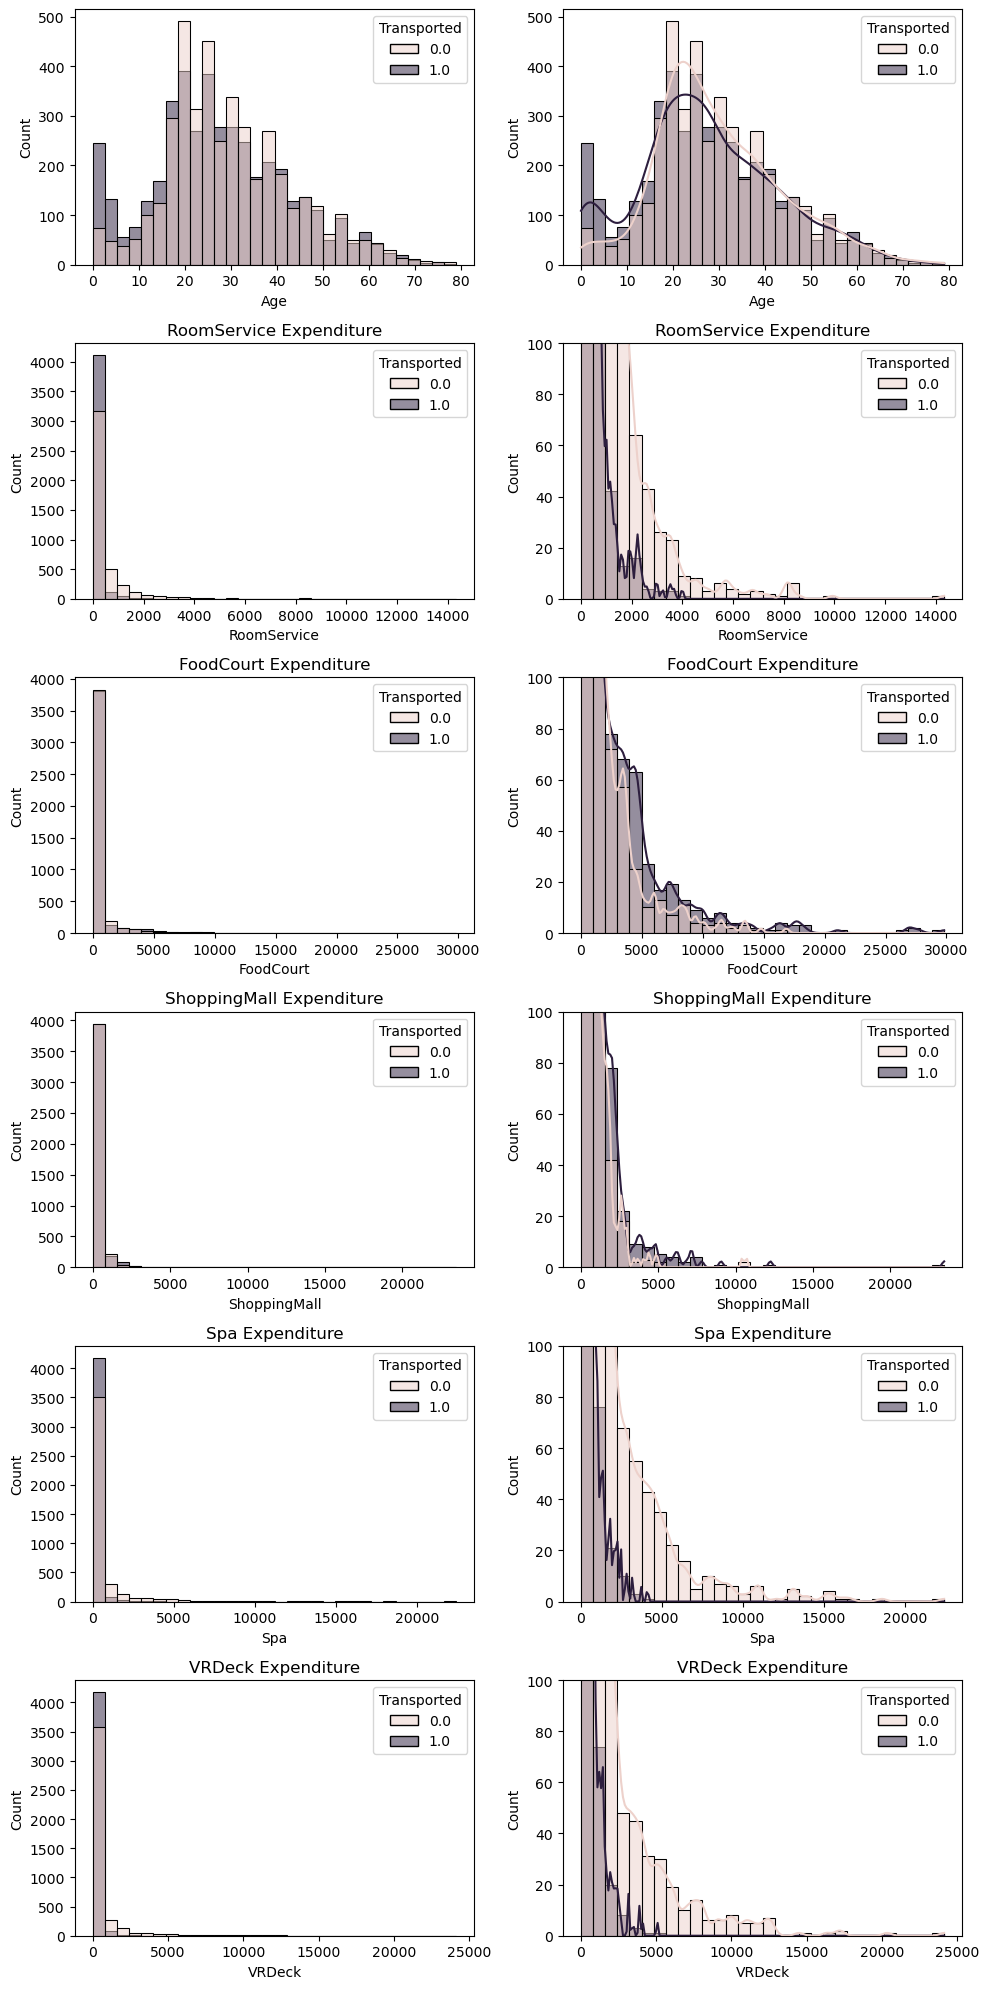

In [216]:
# Numerical features
num_feats=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot numerical features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(num_feats):
    # Left plot
    ax=fig.add_subplot(6,2,2*i+1)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    if(i!=0):
        ax.set_title(var_name + " Expenditure")
    
    # Right plot (truncated)
    ax=fig.add_subplot(6,2,2*i+2)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    if(i!=0):
        plt.ylim([0,100])
        ax.set_title(var_name + " Expenditure")
fig.tight_layout()  # Improves appearance a bit

plt.show()

Majority of passengers did not spend any money. People that spent less money were more likely to be transported. We can build on the relationship between CryoSleep and Transported as people in CryoSleep would not have spent any money. A simple way to verify this observastion is to form some sort of relationship. To make it easier to analyse, we group all individial expense features into a singular expense feature. 

In [217]:
expense_feature = ['RoomService','FoodCourt','Spa','VRDeck','ShoppingMall']
combined_df['TotalExpenditure'] = combined_df.loc[:,expense_feature].sum(axis=1)

temp_combined_df['TotalExpenditure'] = temp_combined_df.loc[:,expense_feature].sum(axis=1)
combined_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0


In [218]:
# Convert 'TotalExpenditure' to a categorical variable indicating spent money or did not
temp_combined_df['TotalExpenditure'] = temp_combined_df['TotalExpenditure'].apply(lambda x: 'Spent Money' if x > 0 else 'Did Not Spend')

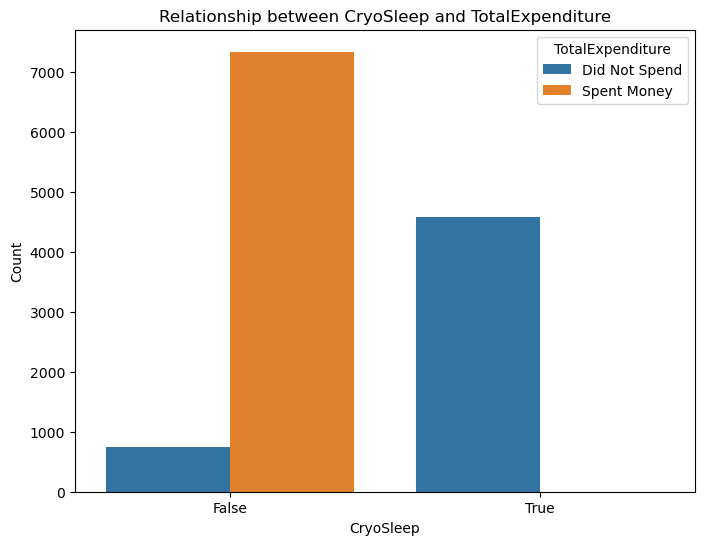

In [219]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CryoSleep', hue='TotalExpenditure', data=temp_combined_df)
plt.title('Relationship between CryoSleep and TotalExpenditure')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.show()

In [220]:
combined_df.groupby('HomePlanet')['VIP'].mean()

HomePlanet
Earth          0.0
Europa    0.057843
Mars      0.034312
Name: VIP, dtype: object

In [221]:
combined_df.groupby('HomePlanet')['Transported'].mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: object

In [222]:
combined_df.groupby('Destination')['Transported'].mean()

Destination
55 Cancri e          0.61
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: object

In [223]:
combined_df.groupby('CryoSleep')['Transported'].mean()

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: object

In [224]:
combined_df.groupby('VIP')['TotalExpenditure'].mean()

VIP
False    1358.276510
True     4595.542125
Name: TotalExpenditure, dtype: float64

#### Age Analysis 



<Axes: >

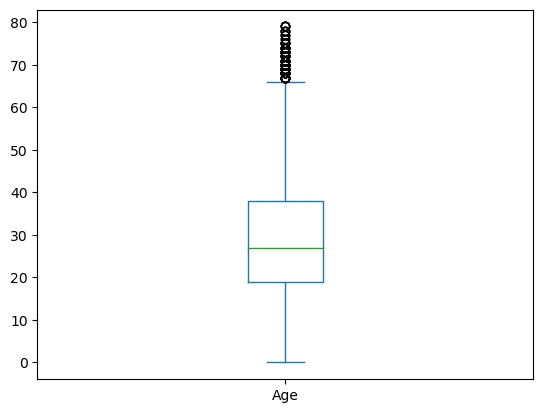

In [225]:
combined_df["Age"].plot(kind="box")

In [226]:
combined_df["Age"].describe()

count    12700.000000
mean        28.771969
std         14.387261
min          0.000000
25%         19.000000
50%         27.000000
75%         38.000000
max         79.000000
Name: Age, dtype: float64

## 3. Feature Engineering

### 3.1 Adjusting Features
#### 3.1.1 Cabins and Passenger IDs


The passengers' ID's and the Cabin location contain multiple forms of information that can be extracted into additional features. The cabin data is listed in the following format: _deck/num/side_. Therefore, we can split the cabin feature into three seperate features. Additionally, PassengerID is listed in the format _gggg _ pp_ , where _gggg_ represents the group number and _pp_ represents a passenger's number within a group. The PassengerID is extracted to form an additional feature

In [227]:
combined_df['Group'] = combined_df['PassengerId'].astype(str).str[:4]

counts = combined_df['Group'].value_counts()
combined_df['Group'] = combined_df['Group'].map(counts)

combined_df[['Deck', 'Number', 'Side']] = combined_df['Cabin'].str.split('/', expand=True)


combined_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure,Group,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,1,F,1,S


#### 3.1.2 Age


From the data analysis done in Section 2, it is seen that the range of the age of passengers is 79 years. This wide range of values in its current numerical form does not provide much meaningful information. However, this can be changed by binning the data into age groups, allowing for trends amongst age groups to be identified more easily. Additionally, having an age group feature will greatly reduce the complexity of models.
Passengers are grouped together in this particular way to identify a relationship between _Age Groups_ and the measured variable (_Transported_) and between _Age Groups_ and _TotalExpenditure_.

In [228]:
combined_df['AgeGroup']=np.nan
combined_df.loc[combined_df['Age']<=12,'AgeGroup']='1'
combined_df.loc[(combined_df['Age']>12) & (combined_df['Age']<18),'AgeGroup']='2'
combined_df.loc[(combined_df['Age']>=18) & (combined_df['Age']<=25),'AgeGroup']='3'
combined_df.loc[(combined_df['Age']>25) & (combined_df['Age']<=30),'AgeGroup']='4'
combined_df.loc[(combined_df['Age']>30) & (combined_df['Age']<=50),'AgeGroup']='5'
combined_df.loc[combined_df['Age']>50,'AgeGroup']='6'

In [229]:
combined_df.groupby('AgeGroup')['Transported'].mean()

AgeGroup
1    0.699752
2    0.553451
3    0.458103
4    0.496272
5    0.479432
6    0.484396
Name: Transported, dtype: object

In [230]:
combined_df.groupby('AgeGroup')['TotalExpenditure'].mean().fillna(0)

AgeGroup
1       0.000000
2     864.158085
3    1109.285911
4    1939.196378
5    1946.321492
6    1941.712022
Name: TotalExpenditure, dtype: float64

From the above relationships there are two key takeaways:
1. Passengers that are from the first _AgeGroup_ (0-12 years old) do not have any expenditure. 
2. Passengers that are from the first _AgeGroup_ (0-12 years old) are the most likely to be transported. 

### 3.2 Filling missing data entries


In [231]:
# Rearrange the order of the columns so that numerical columns are grouped together, categorical columns are grouped together, 
# and the target feature is at the end 
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalExpenditure','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group", "AgeGroup"]
transported=['Transported']
combined_df = combined_df[num_cols+cat_cols+transported].copy()

In [232]:
# Print the count of the total number of  missing data entries
print("Number of missing data entries:", combined_df.isna().sum().sum())


Number of missing data entries: 7993


When dealing with missing data entries it is important to consider why data is missing. Are the data entries Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR) [2] ? This is important to consider when deciding on an imputation 'method to fill the missing data. Having observed the data, it observed that the data that is ...  (Complete)

One way of dealing with missing values is to simply remove rows or columns of data that are missing entries [2]. However, this is method is not particularly useful in the given context as there are 4277 missing data entries. Deleting entire rows or entire feature columns will have a significant impact on the available data as a large volume of important information is being discarded. Therefore, this is not an ideal approach to dealing with missing data. 

Another way of dealing with the missing data is by using a Simple Imputer to fill missing numerical feature data with its mean and categorical feature data with its mode [2]. This method maintains the total number of entries. However, this can lead to slight inaccuracies and bring about biasing in the data. As observed from the data analyis done in Section 2, there are numerous outliers found in the numerical features. These outliers can skew the data and can result in inaccuracies when filling in missing entries. 

However, for certain categorical entries relationships between different variables are deduced and can be used to fill some data entries. For instance, in section 2 it is noted that people that are in "CryoSleep" do not have any expenditure. Using this fact, any missing expenditure features that are missing for passenegers that are in CryoSleep can be filled with a zero. Additionally, it has also been noted that there are no VIP passenegers from Earth. This is utilised to fill in missing data entries where either the VIP status is known to be 'False' but the Home Planet is missing or when the Home Planet is known to be 'Earth' but the VIP status is not known. The remaining missing values in each of these categories are filled in with the next approach .  

The third approach that is considered is the K-Nearest-Neighbours imputation method. (Complete: Wait for Irfaans new code)



 [2] GfG, “ML Handling Missing Values,” GeeksforGeeks, May 04, 2018. https://www.geeksforgeeks.org/ml-handling-missing-values/ (Accessed Mar. 31, 2024).
‌

In [233]:
combined_df.isna().sum()

ShoppingMall         306
FoodCourt            289
RoomService          263
Spa                  284
VRDeck               268
TotalExpenditure       0
Age                  270
CryoSleep            310
Deck                 299
Side                 299
VIP                  296
HomePlanet           288
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

In [234]:
# Function to set expense features to 0 if CryoSleep is True
def adjust_expenses(row):
    if row['CryoSleep'] == True:
        row[expense_feature] = 0
        row['TotalExpenditure'] = 0
    return row

# Apply the function to the DataFrame
combined_df = combined_df.apply(adjust_expenses, axis=1)

In [235]:
# Update the 'VIP' column based on the 'HomePlanet' column
combined_df.loc[:,'VIP'] = combined_df.apply(lambda x: False if x.HomePlanet == "Earth" and pd.isna(x.VIP) else x, axis = 1)

# Update the 'HomePlanet' column based on the 'VIP' column
combined_df.loc[:,'HomePlanet'] = combined_df.apply(lambda x: "Earth" if x.VIP == False and pd.isna(x.HomePlanet) else x, axis = 1)

In [236]:
combined_df.isna().sum()

ShoppingMall         175
FoodCourt            180
RoomService          170
Spa                  177
VRDeck               177
TotalExpenditure       0
Age                  270
CryoSleep            310
Deck                 299
Side                 299
VIP                  137
HomePlanet             9
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

In [237]:
# Update the 'CryoSleep' column based on the 'TotalExpenditure' column
combined_df.loc[:,['CryoSleep']]=combined_df.apply(lambda x: True if x.TotalExpenditure == 0 and pd.isna(x.CryoSleep) else x,axis =1)

In [238]:
combined_df.isna().sum()

ShoppingMall         175
FoodCourt            180
RoomService          170
Spa                  177
VRDeck               177
TotalExpenditure       0
Age                  270
CryoSleep            174
Deck                 299
Side                 299
VIP                  137
HomePlanet             9
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

In [239]:
num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')

In [240]:
combined_df[num_cols] = pd.DataFrame(num_imp.fit_transform(combined_df[num_cols]),columns=num_cols)
combined_df[cat_cols] = pd.DataFrame(cat_imp.fit_transform(combined_df[cat_cols]),columns=cat_cols)

In [241]:
'''
count_missing_vip_earth = 0

# Iterate through rows
for index, row in combined_df.iterrows():
    # Check if HomePlanet is 'Earth' and VIP is missing
    if row['CryoSleep'] == 'True' and pd.isna(row['RoomService']) and pd.isna(row['FoodCourt']) and pd.isna(row['ShoppingMall']) and pd.isna(row['Spa']) and pd.isna(row['VRDeck']):
        count_missing_vip_earth += 1

# Print the count
print(":", count_missing_vip_earth)
'''

'\ncount_missing_vip_earth = 0\n\n# Iterate through rows\nfor index, row in combined_df.iterrows():\n    # Check if HomePlanet is \'Earth\' and VIP is missing\n    if row[\'CryoSleep\'] == \'True\' and pd.isna(row[\'RoomService\']) and pd.isna(row[\'FoodCourt\']) and pd.isna(row[\'ShoppingMall\']) and pd.isna(row[\'Spa\']) and pd.isna(row[\'VRDeck\']):\n        count_missing_vip_earth += 1\n\n# Print the count\nprint(":", count_missing_vip_earth)\n'

In [242]:
# Rearrange the order of the columns so that numerical columns are grouped together, categorical columns are grouped together, 
# and the target feature is at the end 
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalExpenditure','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group","AgeGroup"]
transported=['Transported']
combined_df= combined_df[num_cols+cat_cols+transported].copy()

### 3.3 Scaling Numerical Data

An important aspect of the feature engineering process is to scale features. Feature scaling is a process whereby numerical features from a dataset are standardised to a specific range. This process is advantageous in numerous regards as it [3]:

1. Prevents Feature Dominance: Features with larger ranges have a tendency to dominate the model, resulting in biased results. Feature scaling prevents this from occuring.
2. Improves Algorithm Performance: Many algorithms converge faster when features are scaled. This results in better performance.
3. Enhances Numerical Stability: Reduces the range of varying feature scales, thereby reducing the risk of numerical problems.

Using a StandardScaler is one of the many different ways of scaling features. It achieves this by adjusting the mean and standard deviation of each feature to zero and one, respectively. This ensures that feature dominance is not prevelant during training process. Additionally, StandardScaler does not alter the overall shape of the data's distribution [4].

[3] GfG, “Feature Engineering Scaling, Normalization, and Standardization,” GeeksforGeeks, Jul. 02, 2018. https://www.geeksforgeeks.org/ml-feature-scaling-part-2/ (Accessed Apr. 01, 2024).

[4] GfG, “What is StandardScaler?,” GeeksforGeeks, Feb. 09, 2024. https://www.geeksforgeeks.org/what-is-standardscaler/ (Accessed Apr. 01, 2024).
‌‌

In [243]:
from sklearn.preprocessing import StandardScaler
combined_df[num_cols] = StandardScaler().fit_transform(combined_df[num_cols])
combined_df

,ShoppingMall,FoodCourt,RoomService,Spa,VRDeck,TotalExpenditure,Age,CryoSleep,Deck,Side,VIP,HomePlanet,Destination,Group,AgeGroup,Transported
0,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,7.184543e-01,False,B,P,False,Europa,TRAPPIST-1e,1,5,False
1,-0.253713,-0.280205,-0.175094,0.217417,-0.223108,-0.248363,-3.352005e-01,False,F,S,False,Earth,TRAPPIST-1e,1,3,True
2,-0.296537,1.995972,-0.278018,5.731930,-0.218828,3.188082,2.053084e+00,False,A,S,True,Europa,TRAPPIST-1e,2,6,False
3,0.338966,0.532761,-0.345075,2.703688,-0.095548,1.333249,2.969924e-01,False,A,S,False,Europa,TRAPPIST-1e,2,5,False
4,-0.037882,-0.241280,0.127442,0.231727,-0.259065,-0.121906,-8.971498e-01,False,F,S,False,Earth,TRAPPIST-1e,1,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,3.672360e-01,True,G,S,False,Earth,TRAPPIST-1e,2,5,NaN
12966,-0.267417,0.254540,-0.345075,-0.264633,-0.137497,-0.147910,9.291853e-01,False,F,S,False,Earth,TRAPPIST-1e,1,5,NaN
12967,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,-2.495556e-16,True,D,P,False,Mars,55 Cancri e,1,5,NaN
12968,-0.296537,1.424216,-0.345075,-0.273576,0.186968,0.630429,-2.495556e-16,False,D,P,False,Europa,TRAPPIST-1e,1,5,NaN


#### 3.4 One-Hot Encoding


In [244]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder (handle_unknown='ignore',sparse_output = False)
temp_train = pd.DataFrame(ohe.fit_transform(combined_df[cat_cols]),columns=ohe.get_feature_names_out())
combined_df = combined_df.drop(cat_cols,axis=1)
combined_df = pd.concat([combined_df,temp_train],axis=1)

#### 3.5 Separating Train and Test Data

In [245]:
train_df = combined_df[combined_df['Transported'].notnull()].copy()
train_df.Transported =train_df.Transported.astype('int')
test_df = combined_df[combined_df['Transported'].isnull()].drop("Transported",axis=1)

X = train_df.drop('Transported',axis=1)
y = train_df["Transported"]
print(X)
print(y)

      ShoppingMall  FoodCourt  RoomService       Spa    VRDeck  \
0        -0.296537  -0.285948    -0.345075 -0.273576 -0.260777   
1        -0.253713  -0.280205    -0.175094  0.217417 -0.223108   
2        -0.296537   1.995972    -0.278018  5.731930 -0.218828   
3         0.338966   0.532761    -0.345075  2.703688 -0.095548   
4        -0.037882  -0.241280     0.127442  0.231727 -0.259065   
...            ...        ...          ...       ...       ...   
8688     -0.296537   4.065398    -0.345075  1.195827 -0.197425   
8689     -0.296537  -0.285948    -0.345075 -0.273576 -0.260777   
8690      2.910098  -0.285948    -0.345075 -0.272682 -0.260777   
8691     -0.296537   0.383441    -0.345075  0.042126  2.508735   
8692     -0.296537   2.705563    -0.148583 -0.273576 -0.250504   

      TotalExpenditure       Age  CryoSleep_False  CryoSleep_True  Deck_A  \
0            -0.510541  0.718454              1.0             0.0     0.0   
1            -0.248363 -0.335201              1.0    

#### 3.6 Most Correlated Features    

In [246]:
def get_redundant_pairs(X):
    pairs_to_drop = set()
    cols = X.columns
    for i in range(0, X.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=1):
    au_corr = X.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(X)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations !")
print(get_top_abs_correlations(train_df.select_dtypes(include=['int32','int64']), 10))

Top Absolute Correlations !
CryoSleep_False          CryoSleep_True             1.000000
VIP_False                VIP_True                   1.000000
Side_P                   Side_S                     1.000000
Destination_55 Cancri e  Destination_TRAPPIST-1e    0.783137
FoodCourt                TotalExpenditure           0.743001
HomePlanet_Earth         HomePlanet_Europa          0.633221
Age                      AgeGroup_6                 0.624678
Spa                      TotalExpenditure           0.593307
VRDeck                   TotalExpenditure           0.585552
Deck_G                   HomePlanet_Earth           0.581275
dtype: float64


* Deleting one of the variables with the highest correlation prevents multicorrelation.

    These Feature can delete:
    
    CryoSleep_True , VIP_False , Side_P , Destination_TRAPPIST-1e   , FoodCourt  ,HomePlanet_Earth
    
* We have seen before that 'ShoppingMall' will contribute to the model.

* We used the "Age" variable as  "Age_group" ,we will delete this too

In [247]:
drop_list=['ShoppingMall',"Age",'CryoSleep_True','HomePlanet_Earth', 'VIP_False','FoodCourt','Destination_TRAPPIST-1e', "Side_P"]

X=X.drop(drop_list,axis=1)
train_df=test_df.drop(drop_list,axis=1)

X.columns

Index(['RoomService', 'Spa', 'VRDeck', 'TotalExpenditure', 'CryoSleep_False',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Side_S', 'VIP_True', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Group_1',
       'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7',
       'Group_8', 'AgeGroup_1', 'AgeGroup_2', 'AgeGroup_3', 'AgeGroup_4',
       'AgeGroup_5', 'AgeGroup_6'],
      dtype='object')

## 4 Models


#### 4.1 Model Performance Estimations


In [248]:
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 2
classifiers = [SVC(),RandomForestClassifier(), ExtraTreesClassifier(),GradientBoostingClassifier(),
     CatBoostClassifier(verbose = False),
    XGBClassifier(), LGBMClassifier()]

cross_validation_results = []
for classifier in classifiers :
    cross_validation_results.append(cross_val_score(classifier, X, y = y, scoring = "accuracy", cv = kfold, n_jobs=4))

cross_validation_mean = []
cross_validation_std = []
for cv_result in cross_validation_results:
    cross_validation_mean.append(cv_result.mean())
    cross_validation_std.append(cv_result.std())

cross_validation_res = pd.DataFrame({"CrossValMeans":cross_validation_mean,"CrossValerrors": cross_validation_std,"Algorithm":["SVC", "RandomForest","ExtraTrees","GradientBoosting", "CatBoostClassifier", "XGBClassifier", "LGBMClassifier"]})

In [249]:
cross_validation_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.799959,0.012796,SVC
1,0.789031,0.012574,RandomForest
2,0.763492,0.012906,ExtraTrees
3,0.793286,0.015385,GradientBoosting
4,0.809392,0.015342,CatBoostClassifier
5,0.800767,0.019617,XGBClassifier
6,0.804677,0.016715,LGBMClassifier


#### 4.2 Feature Selection using LBGM Classifier


In [250]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LightGBM model
model = LGBMClassifier()
model.fit(X, y)

# Get permutation materiality
result = permutation_importance(model, X_val, y_val, scoring="accuracy", n_repeats=100, random_state=42)
sorted_indices = np.argsort(result.importances_mean)[::-1]

# Show the most important features and their respective importance values
top_features = X.columns[sorted_indices[:15]]  # 15 Most important feature
top_importances = result.importances_mean[sorted_indices[:15]]
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


VRDeck: 0.08670500287521563
RoomService: 0.07794709603220241
Spa: 0.077458309373203
TotalExpenditure: 0.06428982173663025
CryoSleep_False: 0.0411213341000575
Side_S: 0.016538240368027608
Deck_E: 0.014387579068430136
Deck_F: 0.012978723404255326
Deck_C: 0.012455434157561824
HomePlanet_Mars: 0.007239792984473844
Deck_G: 0.005405405405405409
Deck_B: 0.00499712478435883
HomePlanet_Europa: 0.004939620471535362
AgeGroup_1: 0.004289821736630244
Destination_55 Cancri e: 0.0035710178263369807


In [251]:
top_features

Index(['VRDeck', 'RoomService', 'Spa', 'TotalExpenditure', 'CryoSleep_False',
       'Side_S', 'Deck_E', 'Deck_F', 'Deck_C', 'HomePlanet_Mars', 'Deck_G',
       'Deck_B', 'HomePlanet_Europa', 'AgeGroup_1', 'Destination_55 Cancri e'],
      dtype='object')

In [252]:
# Let's move on with the top 15 features
X_FeatureSelection_LGM = X[top_features]
test_FeatureSelection_LGM = test_df[top_features]

#### 4.3 Feature selection using RFE

In [253]:
# Create the RFE object and rank each pixel
# Initialize LightGBM classifier
clf = LGBMClassifier()
# Initialize RFE with LightGBM as the estimator
rfe = RFE(estimator=clf, n_features_to_select=15)
rfe.fit(X, y)
column_names = X.columns
selected_column_names = column_names[rfe.support_]
selected_column_names

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 32
[LightGBM] [Info] [binary:

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1060
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1058
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Info] Numb

Index(['RoomService', 'Spa', 'VRDeck', 'TotalExpenditure', 'CryoSleep_False',
       'Deck_C', 'Deck_E', 'Deck_F', 'Deck_G', 'Side_S', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e', 'Group_1', 'AgeGroup_3'],
      dtype='object')

## 5. Model tuning

Model tuning or commonly know as hyperparameter optimization is the process of finding the optimal combiation of parameters to govern the learning process of a machine learning model. These hyperparameters can significantly impact the performance of the model [69]. Unlike model parameters which are learned during training, hyperparameters are set prior to the training process and are not derived from the data itself [69]. 

Two methods are utilized to explore hyperparameter optimization namely GridSearch and Optuna. Section 5.1 will explore the use of GridSearch and Section 5.2 will explore the use of Optuna. The comparison of the performance of the two hyperparameter optimization methods is done in Section 5.3. 

[69] K. Li, “Model tuning and what is it ?(using python),” Medium, https://medium.com/@kelfun5354/model-tuning-and-what-is-it-using-python-630e388e224a (accessed Apr. 1, 2024). 

### 5.1 Model tuning using GridSearch

GridSearch is a hyperparameter optimization method that is used in machine learning to find the optimal combination of hyperparameters []. It utilizes an exhaustive search through manually specified hyperparameter space. utilizes a cross-validation or another evaluation methods for evaluating the hyperparameters. This method is powerful because it guarantees finding the most optimal solution within the defined grid, although it can be time-consuming for large hyperparameter spaces.

In [254]:
gridSearch_modelsAccuracy = []

#### 5.1.1 Logistic Regression

In [255]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
X_train, X_test, y_train, y_test = train_test_split(X_FeatureSelection_LGM, y, test_size=0.2, random_state=42   )
lr = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_lr = grid_search.best_estimator_
accuracy = best_lr.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'C': 10, 'penalty': 'l1'}
Test Accuracy: 0.7878


#### 5.1.2 Random Forest Classifier

In [256]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1 , scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.7901


#### 5.1.3 Naive Bayes 

#### 5.1.4 XGBClassifier

In [257]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_XG = grid_search.best_estimator_
accuracy = best_XG.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.7861


#### 5.1.5 CatBoostClassifier

In [258]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.05]
}
catboost_classifier = CatBoostClassifier()
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_catboost = grid_search.best_estimator_
accuracy = best_catboost.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

0:	learn: 0.6697402	total: 5.03ms	remaining: 1.5s
1:	learn: 0.6477702	total: 8.53ms	remaining: 1.27s
2:	learn: 0.6303393	total: 11.6ms	remaining: 1.15s
3:	learn: 0.6140387	total: 14.8ms	remaining: 1.1s
4:	learn: 0.6010530	total: 17.9ms	remaining: 1.06s
5:	learn: 0.5852743	total: 20.5ms	remaining: 1s
6:	learn: 0.5749035	total: 23.3ms	remaining: 976ms
7:	learn: 0.5641519	total: 26ms	remaining: 949ms
8:	learn: 0.5546272	total: 28.7ms	remaining: 929ms
9:	learn: 0.5449459	total: 31.5ms	remaining: 913ms
10:	learn: 0.5363358	total: 34.4ms	remaining: 905ms
11:	learn: 0.5268901	total: 37.1ms	remaining: 890ms
12:	learn: 0.5201309	total: 40ms	remaining: 884ms
13:	learn: 0.5134979	total: 43.1ms	remaining: 880ms
14:	learn: 0.5074987	total: 46ms	remaining: 873ms
15:	learn: 0.5014043	total: 49ms	remaining: 870ms
16:	learn: 0.4961270	total: 51.8ms	remaining: 863ms
17:	learn: 0.4927622	total: 54.7ms	remaining: 857ms
18:	learn: 0.4874616	total: 57.9ms	remaining: 856ms
19:	learn: 0.4828536	total: 60.5ms	

### 5.2 Model tuning using Optuna

Optuna is an open-source hyperparameter optimization framework that can be utilizied in Python [70]. It allows for the process of finding the best hyperparamters to be automated [70]. This framework can be utilized for various number of machine learning and deep learning frameworks [70]. Optuna does not utilize GridSearch or Random Search methods and is more computationally efficient than the two methods [71][72]. This is due to the framework prioritizing promising regions of the hyperparameter space and has a faster convergence to the best hyperparameters [72]. 

Certain key aspects of Optuna is outlined below [70]: 

1. It utilizes algorithms like Bayesian optimization with the Tree-structure Parzen Estimator (TPE) and Hyperband to efficiently search through a larger number of hyperparameters. 

2. The utilization of a pruning stategie provides faster results as a trial is terminated if there is a low likely hood of it yielding good results early in it process. 

3. The flexibility of Optuna allows for custom search spaces to be defined 

4. Optuna includes visualizing features to better understand the performance of different hyperparameters. 

5. Control over the performance methods 

\[70] Nik, “Python optuna: A guide to hyperparameter optimization • datagy,” datagy, https://datagy.io/python-optuna/ (accessed Apr. 1, 2024). \
\[71] A. Shahrour, “Optuna vs GridSearch,” Medium, https://medium.com/@abdalrahman_shahrour/optuna-vs-gridsearch-57227556c450 (accessed Apr. 1, 2024). \
\[72] B. Bald&eacute;, “Bayesian sorcery for hyperparameter optimization using optuna,” Medium, https://medium.com/@becaye-balde/bayesian-sorcery-for-hyperparameter-optimization-using-optuna-1ee4517e89a (accessed Apr. 1, 2024). 

In [259]:
optuna_modelsAccuracy = []

#### 5.2.1 Logistic Regression

In [260]:
#define objective function for hyperparameter optimization using optuna
def objective_LogisticRegression(trial):

  #define hyperparameters to optimize for
  params = {
    "C" : trial.suggest_loguniform('C', 1e-3, 1e3),
    "tol" : trial.suggest_uniform('tol', 1e-6, 1e-3)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = LogisticRegression(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

#run hyperparameter optimization with optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective_LogisticRegression, n_trials=10)

[I 2024-04-01 23:43:40,936] A new study created in memory with name: no-name-90156272-d443-42af-b063-c5c9a778c922
[I 2024-04-01 23:43:41,057] Trial 0 finished with value: 0.7891417431681369 and parameters: {'C': 0.2622252871462138, 'tol': 0.0001539821814975015}. Best is trial 0 with value: 0.7891417431681369.
[I 2024-04-01 23:43:41,190] Trial 1 finished with value: 0.7883366827886085 and parameters: {'C': 0.6543576894836578, 'tol': 0.000170339442635464}. Best is trial 0 with value: 0.7891417431681369.
[I 2024-04-01 23:43:41,314] Trial 2 finished with value: 0.7887965187722796 and parameters: {'C': 904.3287348437289, 'tol': 0.0006613027973723576}. Best is trial 0 with value: 0.7891417431681369.
[I 2024-04-01 23:43:41,429] Trial 3 finished with value: 0.7887966511182241 and parameters: {'C': 1.318868046099404, 'tol': 0.000717125933766877}. Best is trial 0 with value: 0.7891417431681369.
[I 2024-04-01 23:43:41,533] Trial 4 finished with value: 0.7885667000399023 and parameters: {'C': 0.16

In [261]:
#get best hyperparameters
best_params_logitsticRegression = study.best_params
print(f'Best hyperparameters: {best_params_logitsticRegression}')

Best hyperparameters: {'C': 0.2622252871462138, 'tol': 0.0001539821814975015}


In [262]:
#create XGBClassifier model with best hyperparameters
model_logisticRegression = LogisticRegression(**best_params_logitsticRegression, random_state=0)
#fit and predict using model
model_logisticRegression.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_logisticRegression.predict(test_FeatureSelection_LGM)
scores = cross_val_score(model_logisticRegression, X_FeatureSelection_LGM, y, cv=10, scoring='accuracy')
optuna_modelsAccuracy.append(scores.mean())
scores.mean()

0.7921377458566459

#### 5.2.2 Random Forest Classifier

In [263]:
#define objective function for hyperparameter optimization using optuna
def objective_RandomForest(trial):

  #define hyperparameters to optimize for
  params = {
    "n_estimators" : trial.suggest_int('n_estimators', 50, 1000),
    "max_depth" : trial.suggest_int('max_depth', 10, 100),
    "min_samples_split" : trial.suggest_int('min_samples_split', 2, 20)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = RandomForestClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

#run hyperparameter optimization with optuna
study.optimize(objective_RandomForest, n_trials=10)

[I 2024-04-01 23:44:07,812] Trial 10 finished with value: 0.7975414755646375 and parameters: {'n_estimators': 878, 'max_depth': 80, 'min_samples_split': 18}. Best is trial 10 with value: 0.7975414755646375.
[I 2024-04-01 23:44:33,764] Trial 11 finished with value: 0.7973113259673992 and parameters: {'n_estimators': 905, 'max_depth': 83, 'min_samples_split': 19}. Best is trial 10 with value: 0.7975414755646375.
[I 2024-04-01 23:45:01,069] Trial 12 finished with value: 0.7973113259673992 and parameters: {'n_estimators': 955, 'max_depth': 81, 'min_samples_split': 19}. Best is trial 10 with value: 0.7975414755646375.
[I 2024-04-01 23:45:26,331] Trial 13 finished with value: 0.7976564180173122 and parameters: {'n_estimators': 880, 'max_depth': 83, 'min_samples_split': 19}. Best is trial 13 with value: 0.7976564180173122.
[I 2024-04-01 23:45:43,001] Trial 14 finished with value: 0.7996120278641152 and parameters: {'n_estimators': 562, 'max_depth': 69, 'min_samples_split': 15}. Best is trial 

In [264]:
#get best hyperparameters
best_params_randomforest = study.best_params
print(f'Best hyperparameters: {best_params_randomforest}')

Best hyperparameters: {'n_estimators': 562, 'max_depth': 69, 'min_samples_split': 15}


In [265]:
#create XGBClassifier model with best hyperparameters
model_RandomForestClassifier = RandomForestClassifier(**best_params_randomforest, random_state=0)
#fit and predict using model
model_RandomForestClassifier.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_RandomForestClassifier.predict(test_FeatureSelection_LGM)
scores = cross_val_score(model_RandomForestClassifier, X_FeatureSelection_LGM, y, cv=10, scoring='accuracy')
optuna_modelsAccuracy.append(scores.mean())
scores.mean()

0.7999592608758912

#### 5.2.3 Naive Bayes

#### 5.2.4 XGBClassifier

In [266]:

#define objective function for hyperparameter optimization using optuna
def objective_XGBoost(trial):

  #define hyperparameters to optimize for
  params = {
      'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
      'max_depth': trial.suggest_int('max_depth', 10, 100),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 1),
      'subsample': trial.suggest_uniform('subsample', 0.1, 1),
      'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
      #'gamma': trial.suggest_uniform('gamma', 0, 1),
      'alpha': trial.suggest_loguniform('alpha', 2, 5),
      'lambda': trial.suggest_loguniform('lambda', 2, 5),
      'min_child_weight': trial.suggest_int('min_child_weight', 1, 300)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = XGBClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

#run hyperparameter optimization with optuna
study.optimize(objective_XGBoost, n_trials=5)

[I 2024-04-01 23:47:39,292] Trial 20 finished with value: 0.5036235657835443 and parameters: {'n_estimators': 76, 'max_depth': 58, 'learning_rate': 0.009354899560009814, 'subsample': 0.21408643397281113, 'colsample_bytree': 0.6528552332146742, 'alpha': 4.732106697129015, 'lambda': 2.2016696385324153, 'min_child_weight': 258}. Best is trial 14 with value: 0.7996120278641152.


[I 2024-04-01 23:47:41,278] Trial 21 finished with value: 0.7969655721877645 and parameters: {'n_estimators': 619, 'max_depth': 50, 'learning_rate': 0.5934411874763118, 'subsample': 0.9967254976438815, 'colsample_bytree': 0.9846216963079126, 'alpha': 2.1206395766059805, 'lambda': 4.7652848316969845, 'min_child_weight': 12}. Best is trial 14 with value: 0.7996120278641152.
[I 2024-04-01 23:47:42,115] Trial 22 finished with value: 0.782009884918584 and parameters: {'n_estimators': 453, 'max_depth': 40, 'learning_rate': 0.9209012819441835, 'subsample': 0.7620884185241886, 'colsample_bytree': 0.5322026340205288, 'alpha': 3.1669884375374098, 'lambda': 3.5819315860550764, 'min_child_weight': 94}. Best is trial 14 with value: 0.7996120278641152.
[I 2024-04-01 23:47:42,797] Trial 23 finished with value: 0.5036235657835443 and parameters: {'n_estimators': 692, 'max_depth': 65, 'learning_rate': 0.005430566751706541, 'subsample': 0.11277636224135201, 'colsample_bytree': 0.9385430922336497, 'alpha

In [267]:
#get best hyperparameters
best_params_xgbClassifer = study.best_params
print(f'Best hyperparameters: {best_params_xgbClassifer}')

Best hyperparameters: {'n_estimators': 562, 'max_depth': 69, 'min_samples_split': 15}


In [268]:
#create XGBClassifier model with best hyperparameters
model_XGBClassifier = XGBClassifier(**best_params_xgbClassifer, random_state=0)
#fit and predict using model
model_XGBClassifier.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_XGBClassifier.predict(test_FeatureSelection_LGM)
scores = cross_val_score(model_XGBClassifier, X_FeatureSelection_LGM, y, cv=10, scoring='accuracy')
optuna_modelsAccuracy.append(scores.mean())
scores.mean()

0.7861572953454228

#### 5.2.5 CatBoostClassifier (taahir please put the thing you did to suppress the output so we dont have an essay for this ones training)

In [269]:
def objective_CatboostClassfier(trial): 
#define hyperparameters to optimize for
  params = {
      'iterations': trial.suggest_int('iterations', 100, 1000),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 1),
      'depth': trial.suggest_int('depth', 3, 10),
      'loss_function': 'MultiClass'
  }

  #create XGBClassifier model with optimized hyperparameters
  model = CatBoostClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

In [270]:
study.optimize(objective_CatboostClassfier, n_trials=10)
print(f'Best hyperparameters: {study.best_params}')

0:	learn: 0.6764349	total: 4.56ms	remaining: 4.39s
1:	learn: 0.6608260	total: 21.4ms	remaining: 10.3s
2:	learn: 0.6465495	total: 27ms	remaining: 8.65s
3:	learn: 0.6338073	total: 33ms	remaining: 7.91s
4:	learn: 0.6213780	total: 37.4ms	remaining: 7.17s
5:	learn: 0.6111055	total: 42.6ms	remaining: 6.79s
6:	learn: 0.6008680	total: 47.9ms	remaining: 6.54s
7:	learn: 0.5907997	total: 51.8ms	remaining: 6.18s
8:	learn: 0.5827437	total: 55.8ms	remaining: 5.91s
9:	learn: 0.5739085	total: 60.3ms	remaining: 5.75s
10:	learn: 0.5683130	total: 62.1ms	remaining: 5.38s
11:	learn: 0.5615251	total: 66.1ms	remaining: 5.24s
12:	learn: 0.5543088	total: 70.5ms	remaining: 5.15s
13:	learn: 0.5474096	total: 75.5ms	remaining: 5.12s
14:	learn: 0.5404777	total: 79.8ms	remaining: 5.04s
15:	learn: 0.5342449	total: 84.1ms	remaining: 4.98s
16:	learn: 0.5285700	total: 88.1ms	remaining: 4.91s
17:	learn: 0.5234727	total: 91.9ms	remaining: 4.82s
18:	learn: 0.5182963	total: 95.7ms	remaining: 4.75s
19:	learn: 0.5133888	total

49:	learn: 0.4413097	total: 212ms	remaining: 3.87s
50:	learn: 0.4400370	total: 216ms	remaining: 3.86s
51:	learn: 0.4389206	total: 219ms	remaining: 3.84s
52:	learn: 0.4377377	total: 223ms	remaining: 3.82s
53:	learn: 0.4363018	total: 226ms	remaining: 3.81s
54:	learn: 0.4347713	total: 230ms	remaining: 3.8s
55:	learn: 0.4336501	total: 234ms	remaining: 3.79s
56:	learn: 0.4327284	total: 238ms	remaining: 3.78s
57:	learn: 0.4314696	total: 242ms	remaining: 3.77s
58:	learn: 0.4303579	total: 245ms	remaining: 3.76s
59:	learn: 0.4294179	total: 249ms	remaining: 3.74s
60:	learn: 0.4286266	total: 252ms	remaining: 3.73s
61:	learn: 0.4277068	total: 256ms	remaining: 3.72s
62:	learn: 0.4265206	total: 259ms	remaining: 3.7s
63:	learn: 0.4257156	total: 263ms	remaining: 3.69s
64:	learn: 0.4250071	total: 267ms	remaining: 3.68s
65:	learn: 0.4242083	total: 270ms	remaining: 3.67s
66:	learn: 0.4231011	total: 274ms	remaining: 3.66s
67:	learn: 0.4222077	total: 278ms	remaining: 3.66s
68:	learn: 0.4215933	total: 281ms

[I 2024-04-01 23:48:11,825] Trial 25 finished with value: 0.8044428533520913 and parameters: {'iterations': 963, 'learning_rate': 0.04929894640140191, 'depth': 7}. Best is trial 25 with value: 0.8044428533520913.


940:	learn: 0.2977307	total: 3.19s	remaining: 74.7ms
941:	learn: 0.2976967	total: 3.2s	remaining: 71.3ms
942:	learn: 0.2976563	total: 3.2s	remaining: 67.9ms
943:	learn: 0.2975809	total: 3.2s	remaining: 64.5ms
944:	learn: 0.2975391	total: 3.21s	remaining: 61.1ms
945:	learn: 0.2975023	total: 3.21s	remaining: 57.7ms
946:	learn: 0.2974313	total: 3.21s	remaining: 54.3ms
947:	learn: 0.2973361	total: 3.22s	remaining: 50.9ms
948:	learn: 0.2972954	total: 3.22s	remaining: 47.5ms
949:	learn: 0.2972430	total: 3.22s	remaining: 44.1ms
950:	learn: 0.2971955	total: 3.23s	remaining: 40.7ms
951:	learn: 0.2971378	total: 3.23s	remaining: 37.3ms
952:	learn: 0.2970850	total: 3.23s	remaining: 33.9ms
953:	learn: 0.2970190	total: 3.23s	remaining: 30.5ms
954:	learn: 0.2969530	total: 3.24s	remaining: 27.1ms
955:	learn: 0.2968896	total: 3.24s	remaining: 23.7ms
956:	learn: 0.2967871	total: 3.24s	remaining: 20.3ms
957:	learn: 0.2967326	total: 3.25s	remaining: 17ms
958:	learn: 0.2966873	total: 3.25s	remaining: 13.6m

[I 2024-04-01 23:48:28,435] Trial 26 finished with value: 0.8043271168237502 and parameters: {'iterations': 960, 'learning_rate': 0.06224990301706102, 'depth': 7}. Best is trial 25 with value: 0.8044428533520913.


918:	learn: 0.2861251	total: 3.08s	remaining: 137ms
919:	learn: 0.2860754	total: 3.08s	remaining: 134ms
920:	learn: 0.2859963	total: 3.09s	remaining: 131ms
921:	learn: 0.2858695	total: 3.09s	remaining: 127ms
922:	learn: 0.2858348	total: 3.09s	remaining: 124ms
923:	learn: 0.2857383	total: 3.1s	remaining: 121ms
924:	learn: 0.2857035	total: 3.1s	remaining: 117ms
925:	learn: 0.2856523	total: 3.1s	remaining: 114ms
926:	learn: 0.2855324	total: 3.11s	remaining: 111ms
927:	learn: 0.2854605	total: 3.11s	remaining: 107ms
928:	learn: 0.2853945	total: 3.12s	remaining: 104ms
929:	learn: 0.2853183	total: 3.12s	remaining: 101ms
930:	learn: 0.2852245	total: 3.12s	remaining: 97.2ms
931:	learn: 0.2851633	total: 3.12s	remaining: 93.9ms
932:	learn: 0.2851321	total: 3.13s	remaining: 90.5ms
933:	learn: 0.2850597	total: 3.13s	remaining: 87.2ms
934:	learn: 0.2850141	total: 3.13s	remaining: 83.8ms
935:	learn: 0.2849644	total: 3.14s	remaining: 80.5ms
936:	learn: 0.2848890	total: 3.14s	remaining: 77.1ms
937:	lea

[I 2024-04-01 23:48:46,370] Trial 27 finished with value: 0.8063979338151167 and parameters: {'iterations': 999, 'learning_rate': 0.05863841200261685, 'depth': 7}. Best is trial 27 with value: 0.8063979338151167.


0:	learn: 0.6698907	total: 3.49ms	remaining: 3.48s
1:	learn: 0.6488877	total: 6.71ms	remaining: 3.33s
2:	learn: 0.6303145	total: 9.7ms	remaining: 3.21s
3:	learn: 0.6143027	total: 12.6ms	remaining: 3.13s
4:	learn: 0.5990767	total: 16.5ms	remaining: 3.26s
5:	learn: 0.5867290	total: 20.4ms	remaining: 3.37s
6:	learn: 0.5740370	total: 23.9ms	remaining: 3.38s
7:	learn: 0.5623548	total: 27.2ms	remaining: 3.36s
8:	learn: 0.5518242	total: 30.5ms	remaining: 3.34s
9:	learn: 0.5437058	total: 34.1ms	remaining: 3.36s
10:	learn: 0.5355305	total: 37.6ms	remaining: 3.36s
11:	learn: 0.5268378	total: 41.2ms	remaining: 3.37s
12:	learn: 0.5204529	total: 44.1ms	remaining: 3.33s
13:	learn: 0.5139658	total: 47.6ms	remaining: 3.34s
14:	learn: 0.5084084	total: 51.2ms	remaining: 3.35s
15:	learn: 0.5029142	total: 54.8ms	remaining: 3.35s
16:	learn: 0.4979285	total: 58.1ms	remaining: 3.35s
17:	learn: 0.4928472	total: 61.7ms	remaining: 3.35s
18:	learn: 0.4884105	total: 64.7ms	remaining: 3.33s
19:	learn: 0.4839933	to

[I 2024-04-01 23:49:02,970] Trial 28 finished with value: 0.8036369988968965 and parameters: {'iterations': 996, 'learning_rate': 0.06929820025481132, 'depth': 7}. Best is trial 27 with value: 0.8063979338151167.


948:	learn: 0.2786327	total: 3.01s	remaining: 149ms
949:	learn: 0.2785537	total: 3.01s	remaining: 146ms
950:	learn: 0.2784914	total: 3.01s	remaining: 143ms
951:	learn: 0.2784294	total: 3.02s	remaining: 139ms
952:	learn: 0.2783562	total: 3.02s	remaining: 136ms
953:	learn: 0.2782764	total: 3.02s	remaining: 133ms
954:	learn: 0.2782187	total: 3.03s	remaining: 130ms
955:	learn: 0.2781285	total: 3.03s	remaining: 127ms
956:	learn: 0.2780370	total: 3.03s	remaining: 124ms
957:	learn: 0.2779557	total: 3.04s	remaining: 120ms
958:	learn: 0.2778821	total: 3.04s	remaining: 117ms
959:	learn: 0.2777599	total: 3.04s	remaining: 114ms
960:	learn: 0.2776928	total: 3.04s	remaining: 111ms
961:	learn: 0.2776417	total: 3.05s	remaining: 108ms
962:	learn: 0.2775721	total: 3.05s	remaining: 105ms
963:	learn: 0.2775105	total: 3.05s	remaining: 101ms
964:	learn: 0.2773975	total: 3.06s	remaining: 98.2ms
965:	learn: 0.2773595	total: 3.06s	remaining: 95ms
966:	learn: 0.2773030	total: 3.06s	remaining: 91.9ms
967:	learn:

[I 2024-04-01 23:49:19,527] Trial 29 finished with value: 0.8047876807101154 and parameters: {'iterations': 983, 'learning_rate': 0.054667113410026995, 'depth': 7}. Best is trial 27 with value: 0.8063979338151167.


963:	learn: 0.2908696	total: 3.21s	remaining: 63.2ms
964:	learn: 0.2908124	total: 3.21s	remaining: 59.9ms
965:	learn: 0.2907093	total: 3.21s	remaining: 56.5ms
966:	learn: 0.2906760	total: 3.22s	remaining: 53.2ms
967:	learn: 0.2906153	total: 3.22s	remaining: 49.9ms
968:	learn: 0.2905852	total: 3.22s	remaining: 46.6ms
969:	learn: 0.2905152	total: 3.23s	remaining: 43.2ms
970:	learn: 0.2904634	total: 3.23s	remaining: 39.9ms
971:	learn: 0.2904146	total: 3.23s	remaining: 36.6ms
972:	learn: 0.2903529	total: 3.24s	remaining: 33.3ms
973:	learn: 0.2903049	total: 3.24s	remaining: 29.9ms
974:	learn: 0.2902608	total: 3.24s	remaining: 26.6ms
975:	learn: 0.2901604	total: 3.25s	remaining: 23.3ms
976:	learn: 0.2900964	total: 3.25s	remaining: 20ms
977:	learn: 0.2900544	total: 3.25s	remaining: 16.6ms
978:	learn: 0.2899705	total: 3.26s	remaining: 13.3ms
979:	learn: 0.2899189	total: 3.26s	remaining: 9.98ms
980:	learn: 0.2898672	total: 3.26s	remaining: 6.65ms
981:	learn: 0.2897912	total: 3.27s	remaining: 3.

[I 2024-04-01 23:49:36,303] Trial 30 finished with value: 0.8055930719545048 and parameters: {'iterations': 998, 'learning_rate': 0.028155558856182598, 'depth': 7}. Best is trial 27 with value: 0.8063979338151167.


941:	learn: 0.3300160	total: 2.99s	remaining: 178ms
942:	learn: 0.3299840	total: 2.99s	remaining: 175ms
943:	learn: 0.3299426	total: 3s	remaining: 171ms
944:	learn: 0.3299032	total: 3s	remaining: 168ms
945:	learn: 0.3298239	total: 3s	remaining: 165ms
946:	learn: 0.3297891	total: 3s	remaining: 162ms
947:	learn: 0.3297192	total: 3.01s	remaining: 159ms
948:	learn: 0.3296117	total: 3.01s	remaining: 155ms
949:	learn: 0.3295733	total: 3.01s	remaining: 152ms
950:	learn: 0.3295406	total: 3.02s	remaining: 149ms
951:	learn: 0.3294804	total: 3.02s	remaining: 146ms
952:	learn: 0.3294187	total: 3.02s	remaining: 143ms
953:	learn: 0.3293512	total: 3.03s	remaining: 140ms
954:	learn: 0.3292861	total: 3.03s	remaining: 136ms
955:	learn: 0.3292589	total: 3.03s	remaining: 133ms
956:	learn: 0.3292102	total: 3.04s	remaining: 130ms
957:	learn: 0.3291436	total: 3.04s	remaining: 127ms
958:	learn: 0.3290879	total: 3.04s	remaining: 124ms
959:	learn: 0.3290159	total: 3.04s	remaining: 121ms
960:	learn: 0.3289314	to

[I 2024-04-01 23:49:53,034] Trial 31 finished with value: 0.8057080805801518 and parameters: {'iterations': 996, 'learning_rate': 0.026234183022770106, 'depth': 7}. Best is trial 27 with value: 0.8063979338151167.


968:	learn: 0.3326127	total: 3.28s	remaining: 91.5ms
969:	learn: 0.3325302	total: 3.29s	remaining: 88.1ms
970:	learn: 0.3324674	total: 3.29s	remaining: 84.7ms
971:	learn: 0.3324185	total: 3.29s	remaining: 81.3ms
972:	learn: 0.3323170	total: 3.29s	remaining: 77.9ms
973:	learn: 0.3322810	total: 3.3s	remaining: 74.5ms
974:	learn: 0.3322593	total: 3.3s	remaining: 71.1ms
975:	learn: 0.3322165	total: 3.3s	remaining: 67.7ms
976:	learn: 0.3321613	total: 3.31s	remaining: 64.3ms
977:	learn: 0.3320911	total: 3.31s	remaining: 60.9ms
978:	learn: 0.3320404	total: 3.31s	remaining: 57.6ms
979:	learn: 0.3319889	total: 3.32s	remaining: 54.2ms
980:	learn: 0.3319311	total: 3.32s	remaining: 50.8ms
981:	learn: 0.3318800	total: 3.32s	remaining: 47.4ms
982:	learn: 0.3318033	total: 3.33s	remaining: 44ms
983:	learn: 0.3317149	total: 3.33s	remaining: 40.6ms
984:	learn: 0.3316745	total: 3.33s	remaining: 37.2ms
985:	learn: 0.3316211	total: 3.34s	remaining: 33.9ms
986:	learn: 0.3315766	total: 3.34s	remaining: 30.5m

[I 2024-04-01 23:50:10,640] Trial 32 finished with value: 0.8062831898813585 and parameters: {'iterations': 991, 'learning_rate': 0.025261668937814053, 'depth': 7}. Best is trial 27 with value: 0.8063979338151167.


983:	learn: 0.3332203	total: 3.51s	remaining: 25ms
984:	learn: 0.3331723	total: 3.52s	remaining: 21.4ms
985:	learn: 0.3331198	total: 3.52s	remaining: 17.9ms
986:	learn: 0.3330760	total: 3.52s	remaining: 14.3ms
987:	learn: 0.3329921	total: 3.53s	remaining: 10.7ms
988:	learn: 0.3329506	total: 3.53s	remaining: 7.14ms
989:	learn: 0.3329206	total: 3.54s	remaining: 3.57ms
990:	learn: 0.3328684	total: 3.54s	remaining: 0us
0:	learn: 0.6857286	total: 5.96ms	remaining: 5.89s
1:	learn: 0.6784003	total: 10.3ms	remaining: 5.09s
2:	learn: 0.6713864	total: 15.2ms	remaining: 5.01s
3:	learn: 0.6645367	total: 20.4ms	remaining: 5.02s
4:	learn: 0.6582494	total: 25.3ms	remaining: 4.99s
5:	learn: 0.6519880	total: 29.9ms	remaining: 4.9s
6:	learn: 0.6457487	total: 34.6ms	remaining: 4.86s
7:	learn: 0.6398213	total: 39.3ms	remaining: 4.82s
8:	learn: 0.6341709	total: 44.4ms	remaining: 4.84s
9:	learn: 0.6286320	total: 49.3ms	remaining: 4.83s
10:	learn: 0.6234916	total: 54.5ms	remaining: 4.85s
11:	learn: 0.6182764

[I 2024-04-01 23:50:36,763] Trial 33 finished with value: 0.8051331036248893 and parameters: {'iterations': 989, 'learning_rate': 0.02095320239167748, 'depth': 8}. Best is trial 27 with value: 0.8063979338151167.


971:	learn: 0.3321057	total: 4.79s	remaining: 83.7ms
972:	learn: 0.3320306	total: 4.79s	remaining: 78.8ms
973:	learn: 0.3319635	total: 4.8s	remaining: 73.9ms
974:	learn: 0.3319014	total: 4.8s	remaining: 69ms
975:	learn: 0.3318378	total: 4.81s	remaining: 64ms
976:	learn: 0.3317963	total: 4.81s	remaining: 59.1ms
977:	learn: 0.3316908	total: 4.82s	remaining: 54.2ms
978:	learn: 0.3316474	total: 4.82s	remaining: 49.2ms
979:	learn: 0.3315940	total: 4.82s	remaining: 44.3ms
980:	learn: 0.3315437	total: 4.83s	remaining: 39.4ms
981:	learn: 0.3314305	total: 4.83s	remaining: 34.5ms
982:	learn: 0.3313412	total: 4.84s	remaining: 29.5ms
983:	learn: 0.3312560	total: 4.84s	remaining: 24.6ms
984:	learn: 0.3311802	total: 4.85s	remaining: 19.7ms
985:	learn: 0.3310883	total: 4.85s	remaining: 14.8ms
986:	learn: 0.3310473	total: 4.86s	remaining: 9.84ms
987:	learn: 0.3310159	total: 4.86s	remaining: 4.92ms
988:	learn: 0.3309360	total: 4.87s	remaining: 0us
0:	learn: 0.6865506	total: 1.73ms	remaining: 1.12s
1:	l

[I 2024-04-01 23:50:42,264] Trial 34 finished with value: 0.801451901182577 and parameters: {'iterations': 647, 'learning_rate': 0.02376008675738888, 'depth': 4}. Best is trial 27 with value: 0.8063979338151167.


621:	learn: 0.3975302	total: 979ms	remaining: 39.3ms
622:	learn: 0.3975021	total: 980ms	remaining: 37.8ms
623:	learn: 0.3974444	total: 982ms	remaining: 36.2ms
624:	learn: 0.3974148	total: 983ms	remaining: 34.6ms
625:	learn: 0.3973778	total: 985ms	remaining: 33ms
626:	learn: 0.3973091	total: 986ms	remaining: 31.5ms
627:	learn: 0.3972395	total: 988ms	remaining: 29.9ms
628:	learn: 0.3972097	total: 989ms	remaining: 28.3ms
629:	learn: 0.3971706	total: 991ms	remaining: 26.7ms
630:	learn: 0.3971364	total: 992ms	remaining: 25.2ms
631:	learn: 0.3971129	total: 994ms	remaining: 23.6ms
632:	learn: 0.3970896	total: 995ms	remaining: 22ms
633:	learn: 0.3969013	total: 997ms	remaining: 20.4ms
634:	learn: 0.3968344	total: 998ms	remaining: 18.9ms
635:	learn: 0.3967927	total: 1000ms	remaining: 17.3ms
636:	learn: 0.3967462	total: 1s	remaining: 15.7ms
637:	learn: 0.3967265	total: 1s	remaining: 14.1ms
638:	learn: 0.3966844	total: 1s	remaining: 12.6ms
639:	learn: 0.3965041	total: 1s	remaining: 11ms
640:	learn

In [271]:
best_params_catboost = study.best_params
print("Best Hyperparameters:", best_params_catboost)

Best Hyperparameters: {'iterations': 999, 'learning_rate': 0.05863841200261685, 'depth': 7}


In [272]:
model_CatBoostClassifier = CatBoostClassifier(**best_params_catboost, random_state=0)
model_CatBoostClassifier.fit(X_FeatureSelection_LGM,y)
score = cross_val_score(model_CatBoostClassifier, X_FeatureSelection_LGM, y, cv=5).mean()
optuna_modelsAccuracy.append(score.mean())
score.mean()

0:	learn: 0.6657618	total: 4.3ms	remaining: 4.29s
1:	learn: 0.6424451	total: 8.53ms	remaining: 4.25s
2:	learn: 0.6178474	total: 12.6ms	remaining: 4.18s
3:	learn: 0.5989409	total: 16.9ms	remaining: 4.21s
4:	learn: 0.5842660	total: 21ms	remaining: 4.17s
5:	learn: 0.5680824	total: 25ms	remaining: 4.14s
6:	learn: 0.5519864	total: 29ms	remaining: 4.11s
7:	learn: 0.5400114	total: 32.8ms	remaining: 4.07s
8:	learn: 0.5289644	total: 36.9ms	remaining: 4.06s
9:	learn: 0.5210703	total: 41.7ms	remaining: 4.13s
10:	learn: 0.5104137	total: 45.7ms	remaining: 4.11s
11:	learn: 0.5025667	total: 49.6ms	remaining: 4.08s
12:	learn: 0.4955470	total: 53.2ms	remaining: 4.04s
13:	learn: 0.4896937	total: 57.1ms	remaining: 4.02s
14:	learn: 0.4833850	total: 61.1ms	remaining: 4.01s
15:	learn: 0.4784030	total: 65.1ms	remaining: 4s
16:	learn: 0.4737142	total: 70.4ms	remaining: 4.07s
17:	learn: 0.4697233	total: 74.7ms	remaining: 4.07s
18:	learn: 0.4655228	total: 78.5ms	remaining: 4.05s
19:	learn: 0.4619650	total: 83.1

95:	learn: 0.3828709	total: 389ms	remaining: 3.66s
96:	learn: 0.3825385	total: 394ms	remaining: 3.66s
97:	learn: 0.3823177	total: 398ms	remaining: 3.66s
98:	learn: 0.3820613	total: 402ms	remaining: 3.65s
99:	learn: 0.3816702	total: 406ms	remaining: 3.65s
100:	learn: 0.3812876	total: 411ms	remaining: 3.65s
101:	learn: 0.3804938	total: 425ms	remaining: 3.74s
102:	learn: 0.3802611	total: 430ms	remaining: 3.74s
103:	learn: 0.3798249	total: 437ms	remaining: 3.76s
104:	learn: 0.3796169	total: 442ms	remaining: 3.76s
105:	learn: 0.3792661	total: 447ms	remaining: 3.76s
106:	learn: 0.3789291	total: 452ms	remaining: 3.76s
107:	learn: 0.3786587	total: 456ms	remaining: 3.76s
108:	learn: 0.3783882	total: 461ms	remaining: 3.77s
109:	learn: 0.3781519	total: 466ms	remaining: 3.77s
110:	learn: 0.3778836	total: 471ms	remaining: 3.77s
111:	learn: 0.3776255	total: 476ms	remaining: 3.77s
112:	learn: 0.3774115	total: 481ms	remaining: 3.77s
113:	learn: 0.3771409	total: 485ms	remaining: 3.76s
114:	learn: 0.376

0.8046730691223015

### 5.3 Comparison of GridSearch and Optuna 

In [273]:
def tabulate_vectors(vector1, vector2, vector3):
    # Determine the maximum width for the model names
    max_width = max(len(name) for name in vector1) + 2  # Add some padding

    # Print the header with fixed spacing
    print(f"{'Model'.ljust(max_width)}\t{'GridSearch Accuracy'.ljust(20)}\t{'Optuna Accuracy'.ljust(20)}")

    # Print each row of the combined vectors with fixed spacing
    for row in zip(vector1, vector2, vector3):
        print(f"{row[0].ljust(max_width)}\t{str(row[1]).ljust(20)}\t{str(row[2]).ljust(20)}")


print(gridSearch_modelsAccuracy)
print(optuna_modelsAccuracy)
tabulate_vectors(["Logistic Regression", "Random Forest", "XGBoost", "CatBoost"], gridSearch_modelsAccuracy, optuna_modelsAccuracy)

[0.7878090856814262, 0.7901092581943646, 0.7860839562967222, 0.79700977573318]
[0.7921377458566459, 0.7999592608758912, 0.7861572953454228, 0.8046730691223015]
Model                	GridSearch Accuracy 	Optuna Accuracy     
Logistic Regression  	0.7878090856814262  	0.7921377458566459  
Random Forest        	0.7901092581943646  	0.7999592608758912  
XGBoost              	0.7860839562967222  	0.7861572953454228  
CatBoost             	0.79700977573318    	0.8046730691223015  


The comparison of the Optuna and GridSearch hyperparameter optimization algorithms shows that Optuna does converge to better hyperparameters as the accuracy obtained from these models are slighty better performing compared to the models produced by the GridSearch algorithm. Therefore, the use of the Optuna algoritm will be utilized as a better hyperparameters can be achieved with less trials and less computational power. 